In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.isnull().sum()
#no null value present in dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [4]:
df.shape
#nu of rows is 30 
#nu of column is 17 

(30, 17)

In [5]:
#The column names present in our data that is not making much sense and will need deciphering to be converted into understandable format. In order to gain understanding of different columns in dataset, following baseball stastics terminology I get from Wikipedia or from dataset.
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
# replacing the abbrevations with Complete word redability and enhancing interpretation
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.describe()
#Runs scored mostly will be left skewed data.
#doubles is left skewed.
#triepls is right skewed.
#75% and max values for Errors, Shutouts, Run Scored shows presence of possible outliers.
#progressing in a definite manner showing no visible abnormalities for mean , max .

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.info()
#no categoreical  data  is present
#only numberic data is present 
#it will fall under regression analysis
#Just one Feature  ERA is in float as it is an ratio type feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

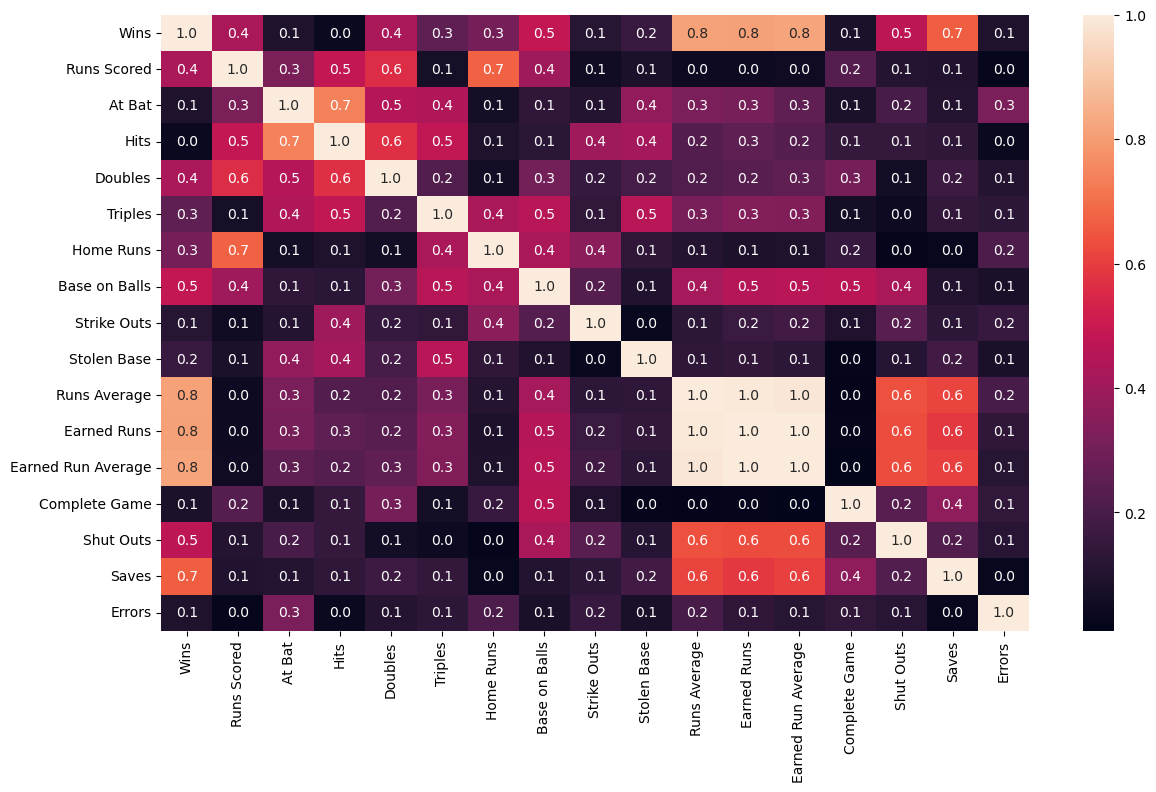

In [9]:
df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,fmt='0.1f',annot=True)
plt.show()
#Note that there are three highly correlated features.
#They are as follows:
#Earned Runs
#Earned_Runes_Average_(AVG)

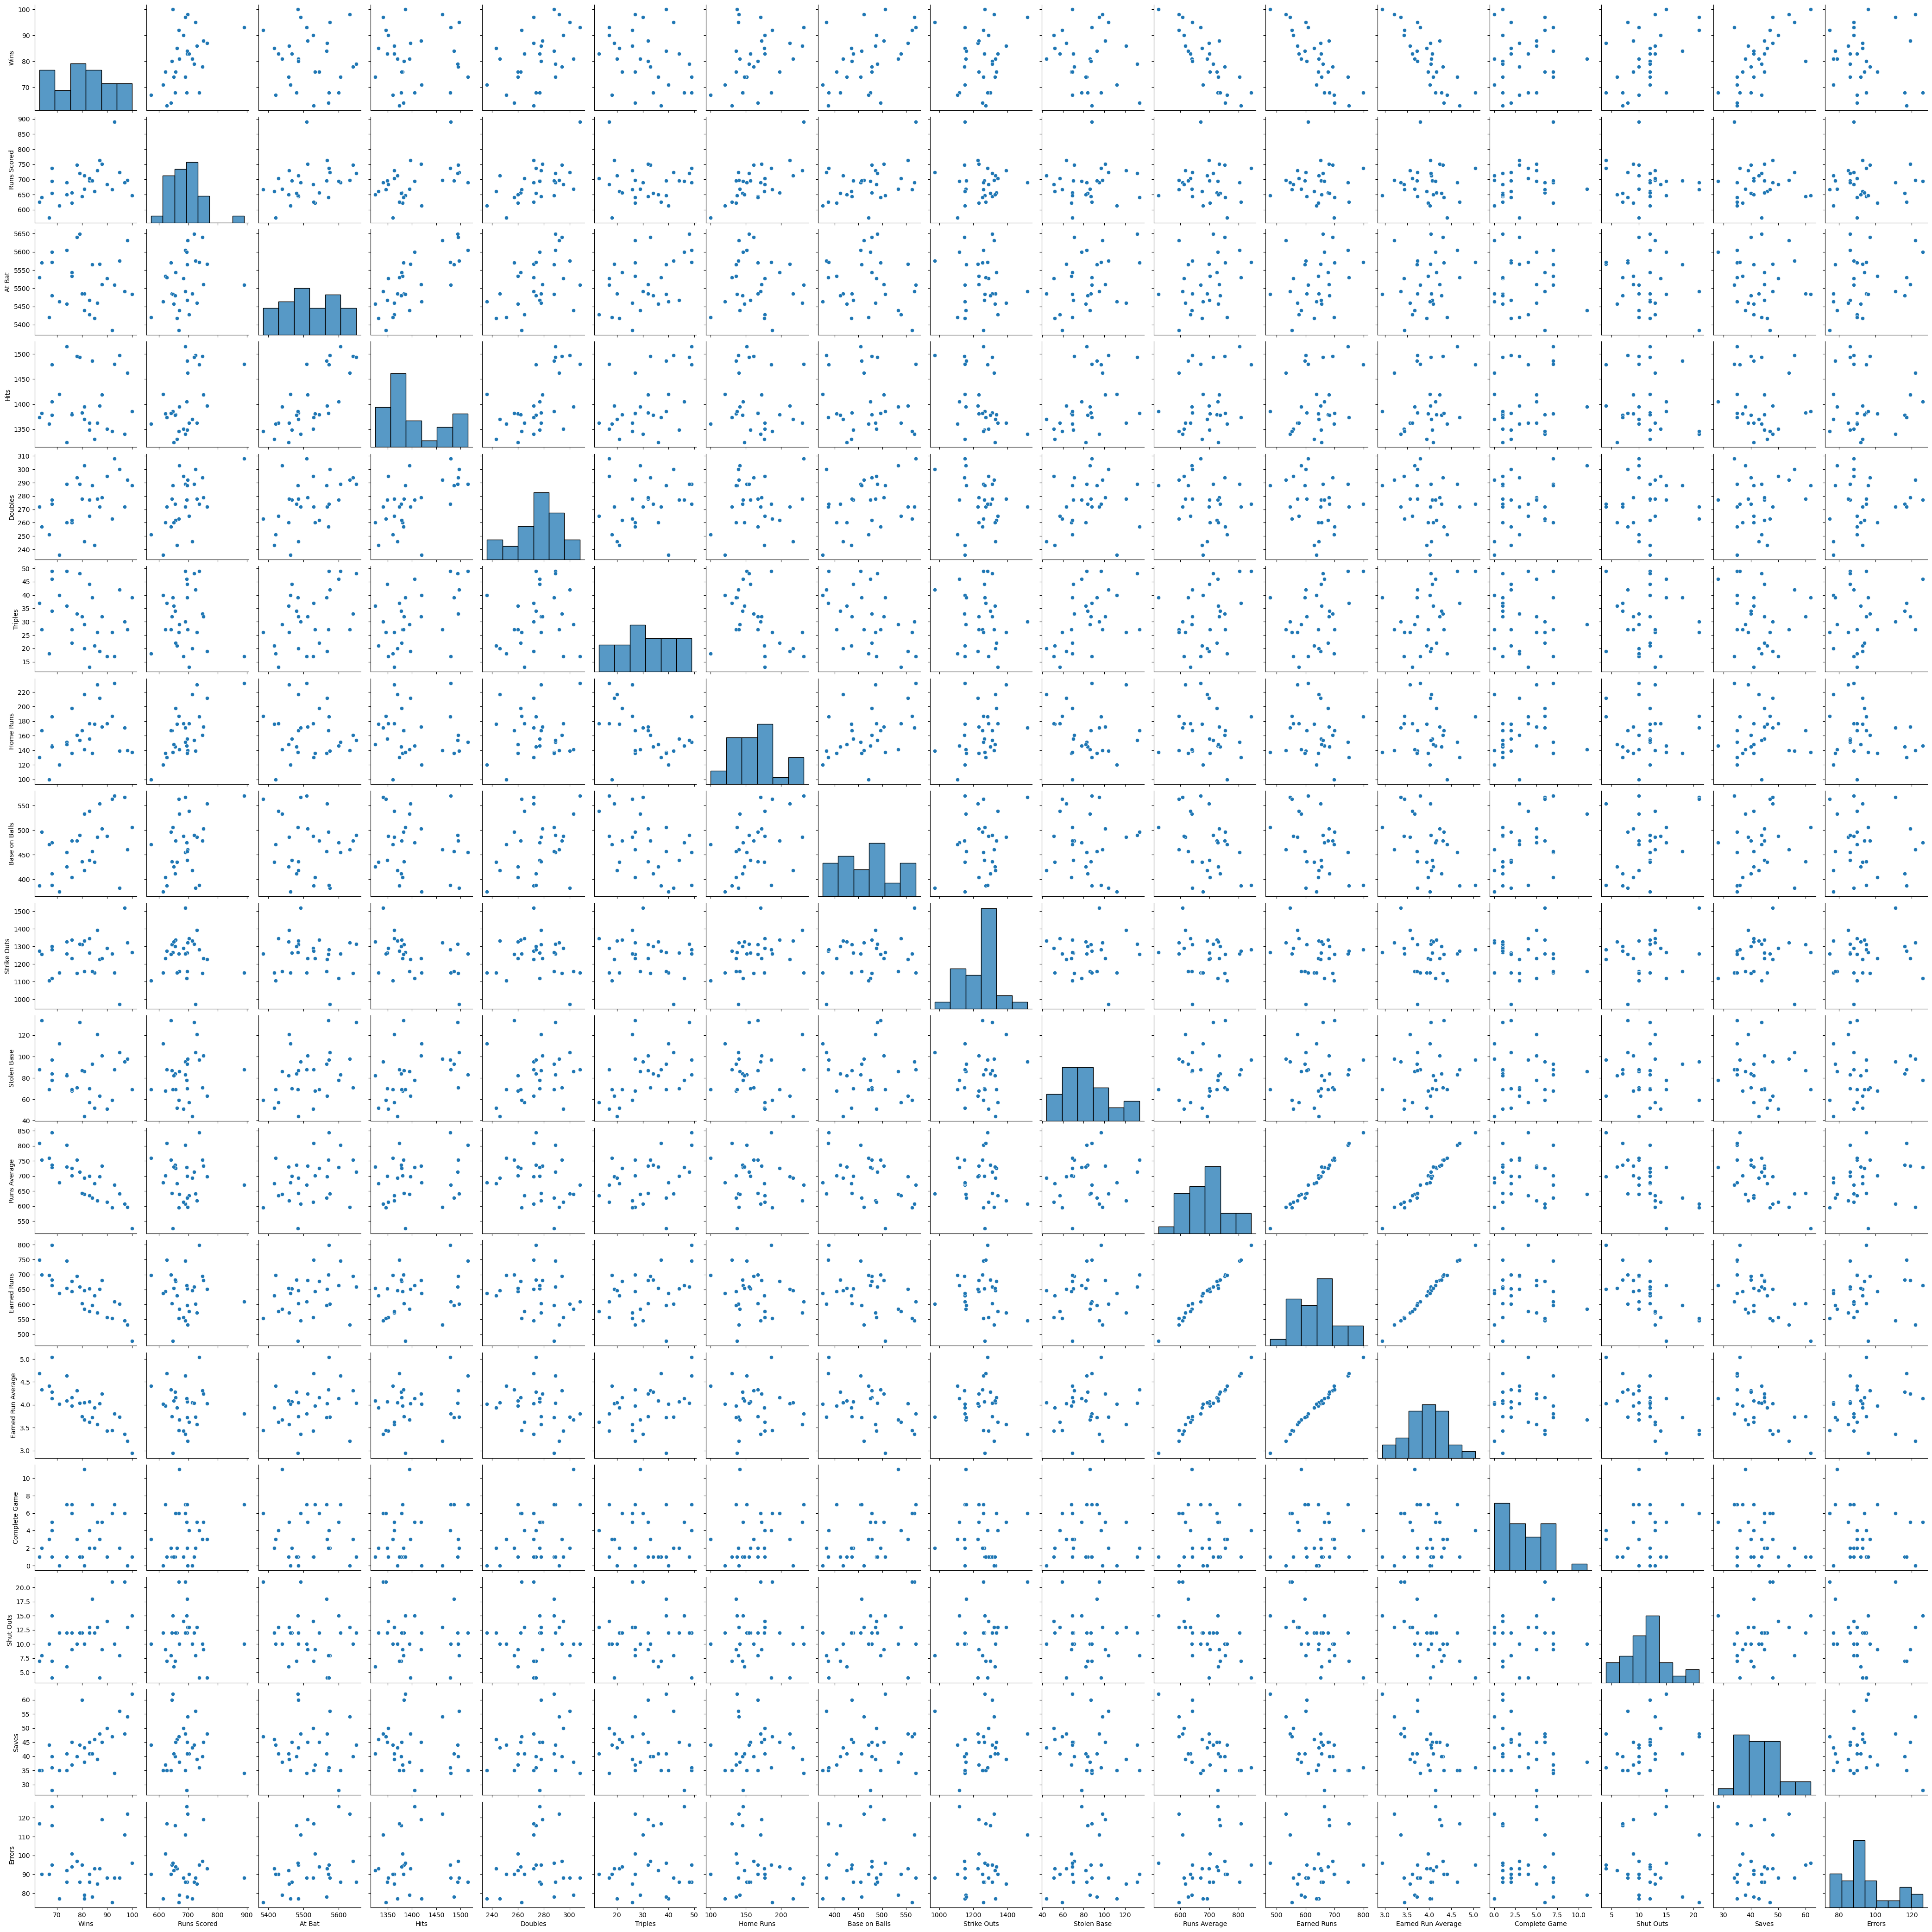

In [10]:
sns.pairplot(df)
#We have very less number of samples and there are to many number of features in the data.
#overfitting as the model have very high difference
#need to remove some data to remove overfitting your not able to add data 

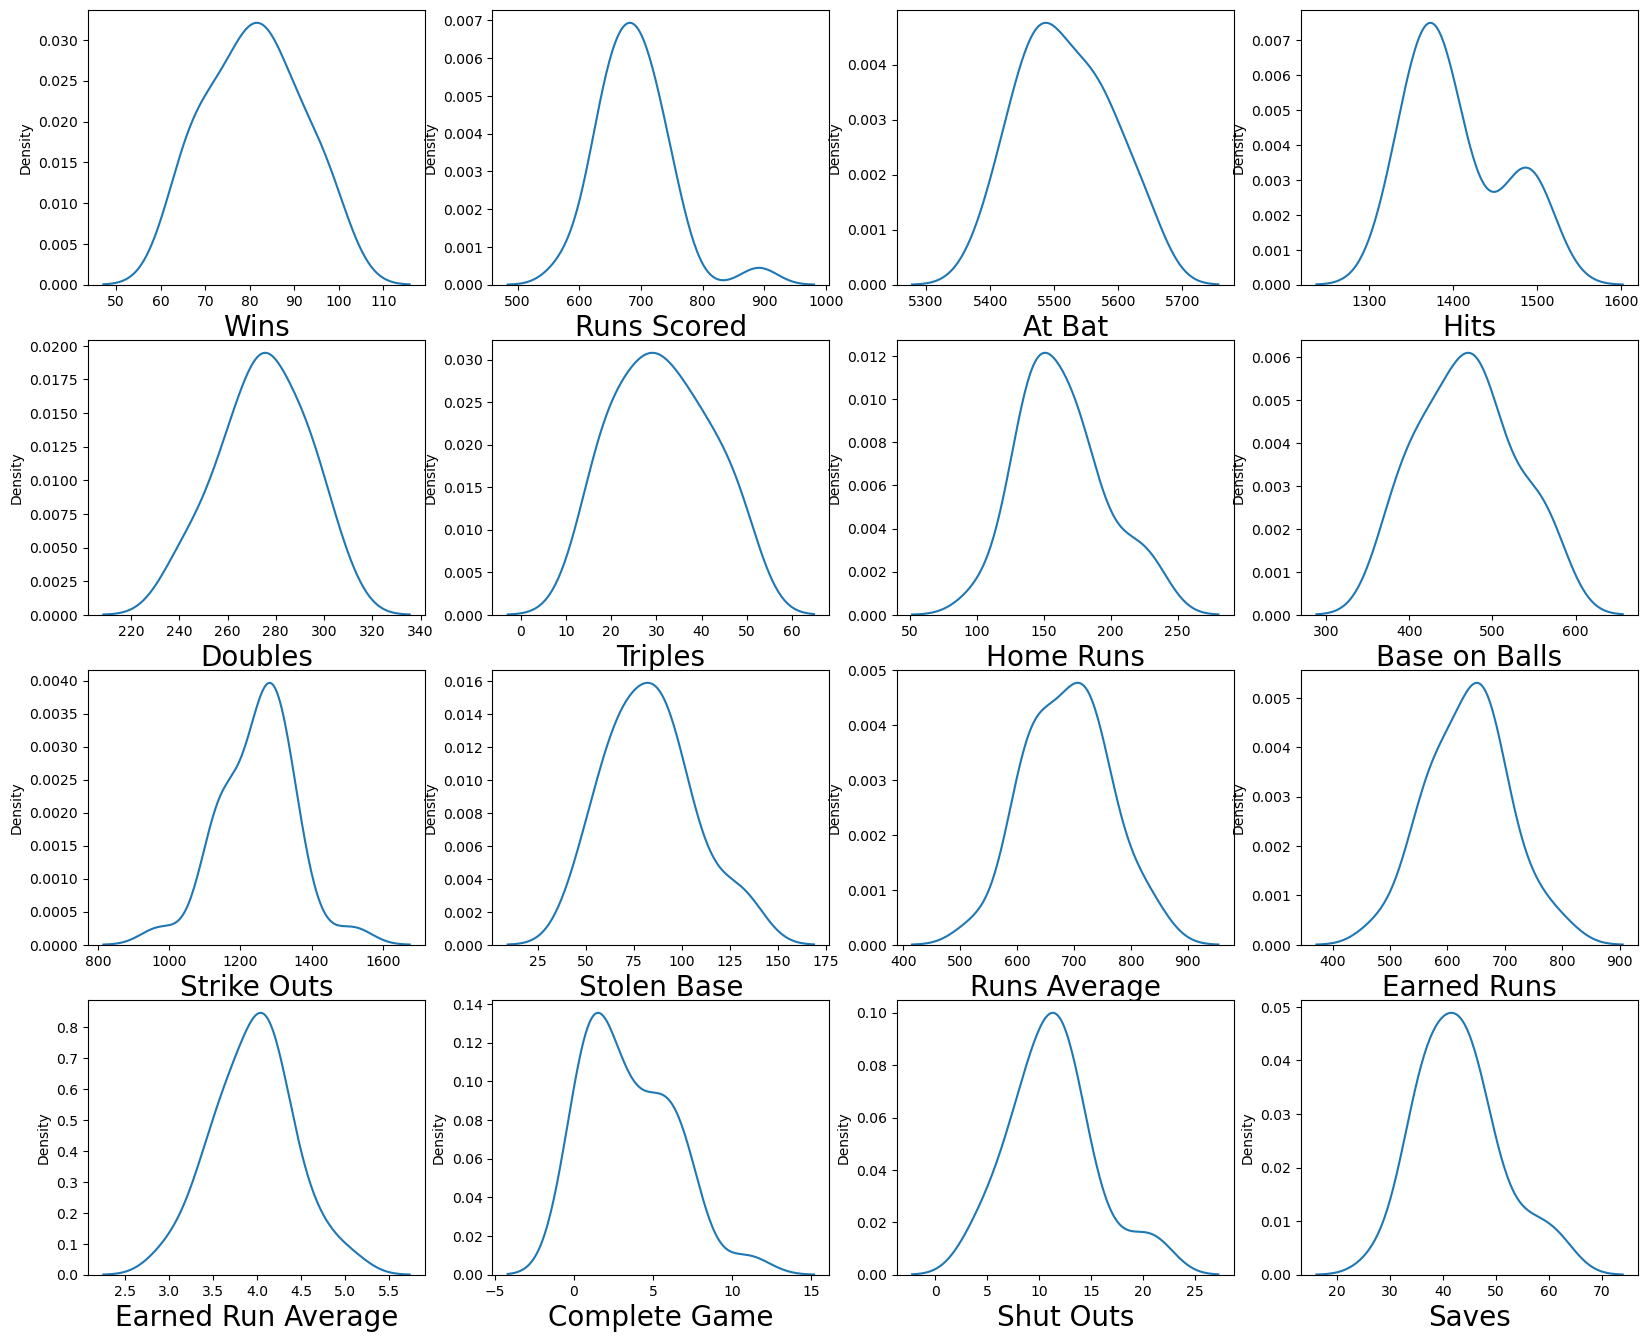

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<17:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   
#Clearly some of feature are either left or right skewed.

In [12]:
df.skew()*100
#while checking the skewness, it has been observed that many columns are above standard thresh hold , have considered 0.5 is the standard threshold,  we will treat the skeweness

Wins                    4.708869
Runs Scored           120.078636
At Bat                 18.343656
Hits                   67.025372
Doubles               -23.064992
Triples                12.950245
Home Runs              51.644074
Base on Balls          15.849848
Strike Outs           -15.606548
Stolen Base            47.989287
Runs Average            4.573398
Earned Runs             5.870980
Earned Run Average      5.333134
Complete Game          73.684527
Shut Outs              56.579043
Saves                  65.752355
Errors                 89.013183
dtype: float64

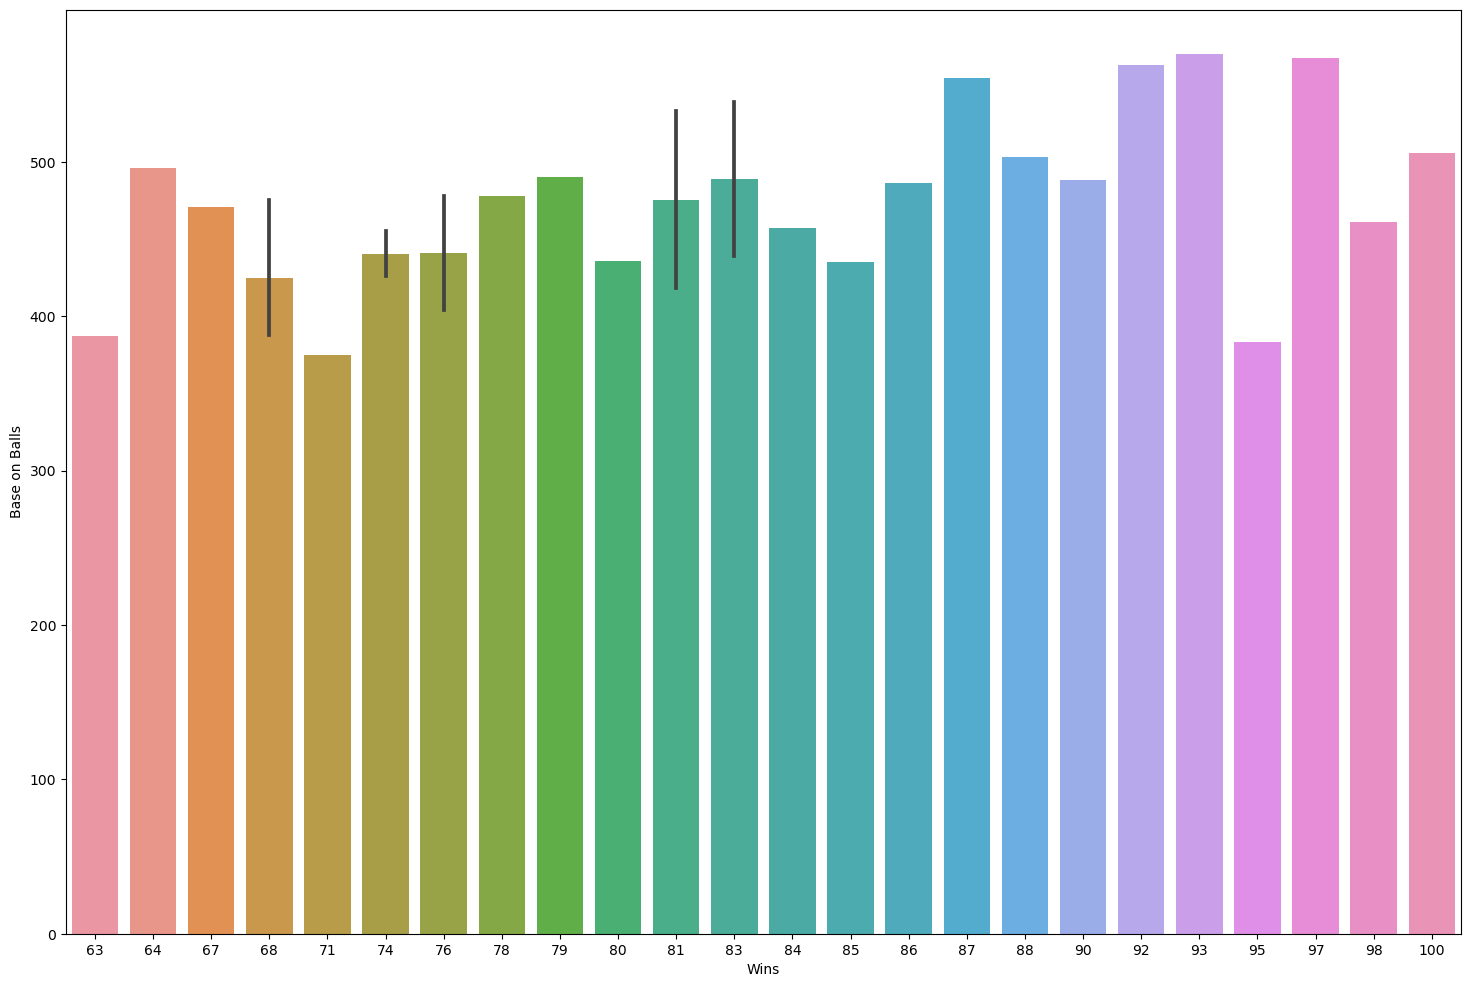

In [13]:
plt.figure(figsize=(18,12))
sns.barplot(x='Wins',y='Base on Balls',data=df)
plt.show()
#Base on ball is contribution from pitcher to batter for winning. 
#We can see that base on ball above 400 really contribute in Wins in team.

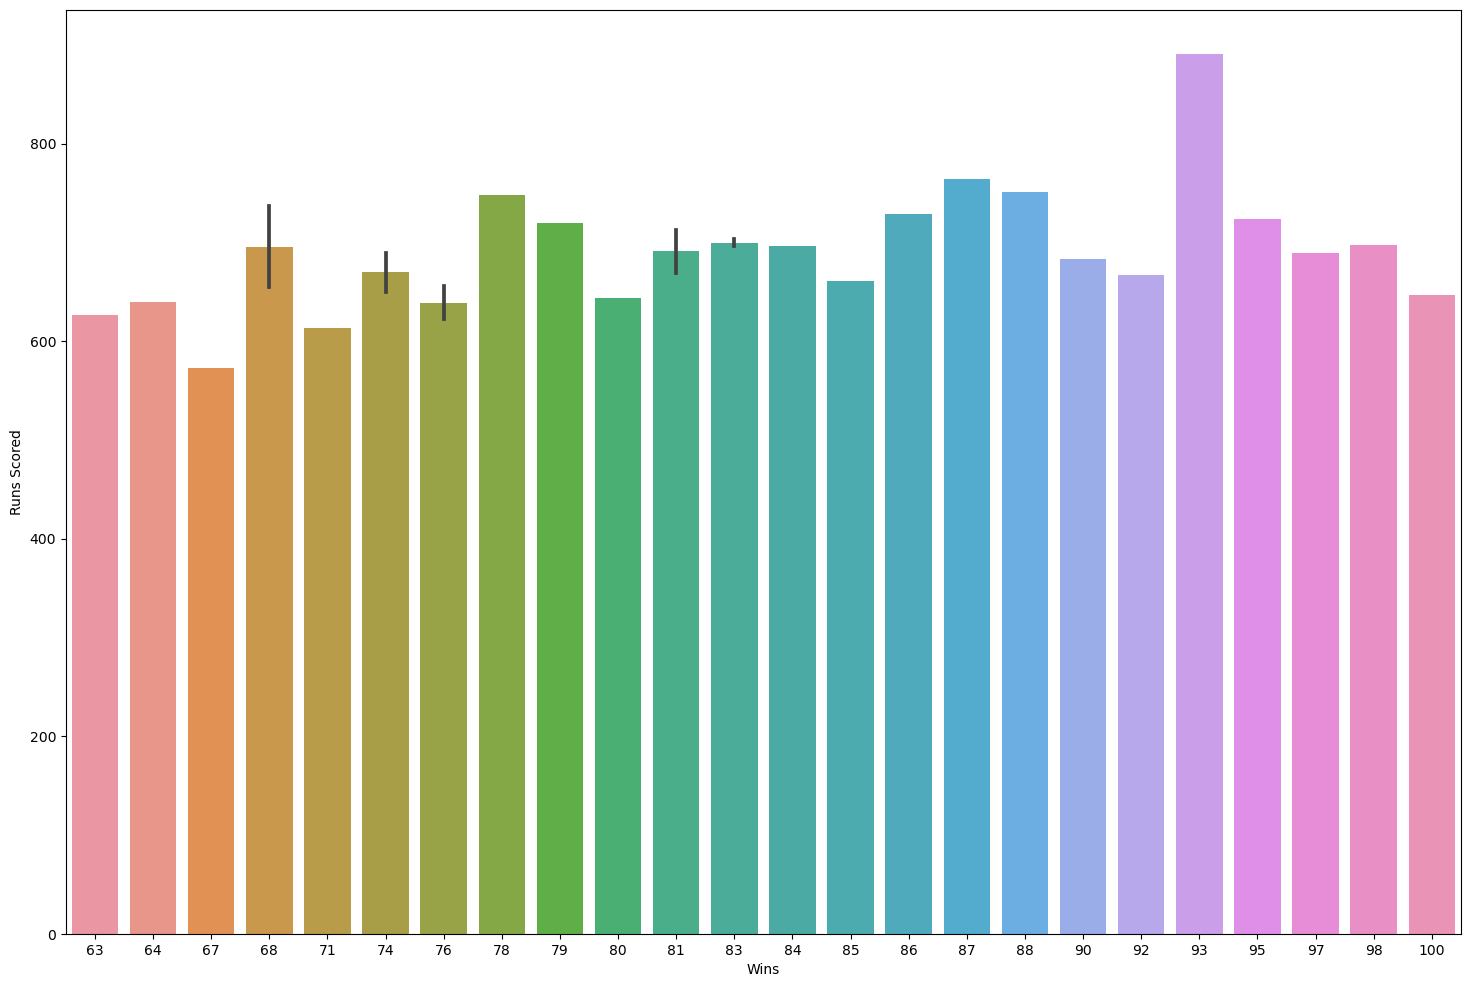

In [14]:
plt.figure(figsize=(18,12))
sns.barplot(x='Wins',y='Runs Scored',data=df)
plt.show()
#Run Scored above 600 is benchmark for wining in any scenerio

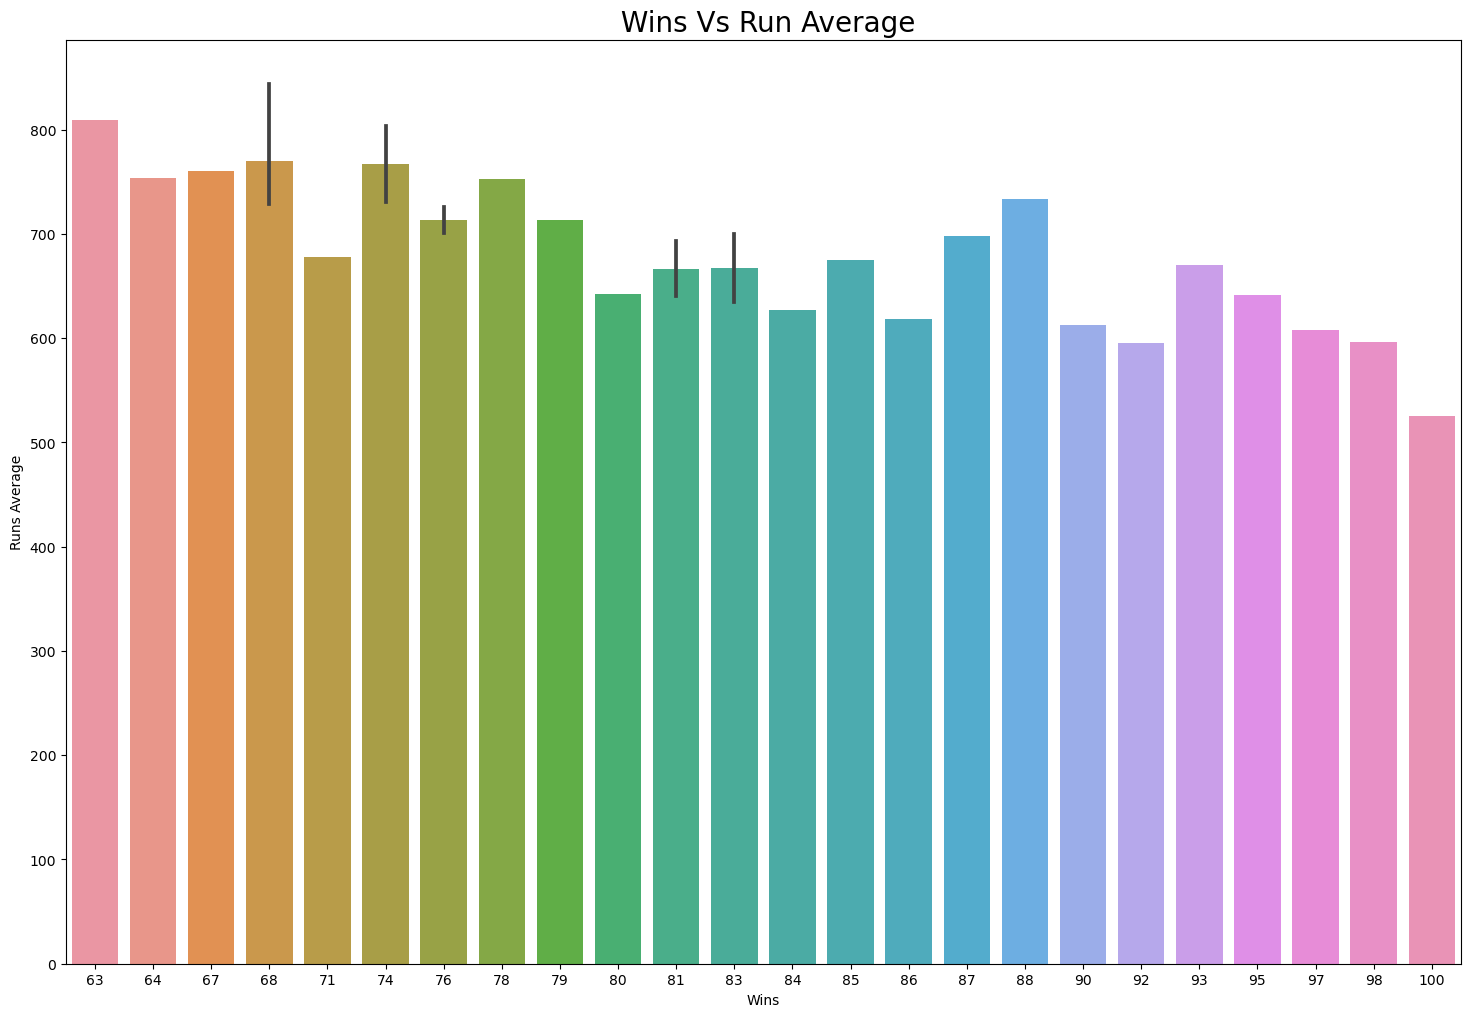

In [15]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Average", data=df)
plt.title(' Wins Vs Run Average', fontsize =20)
plt.show()
# Run Average decrease with increase in number of wins.
#if more run it will give more chance of wining 

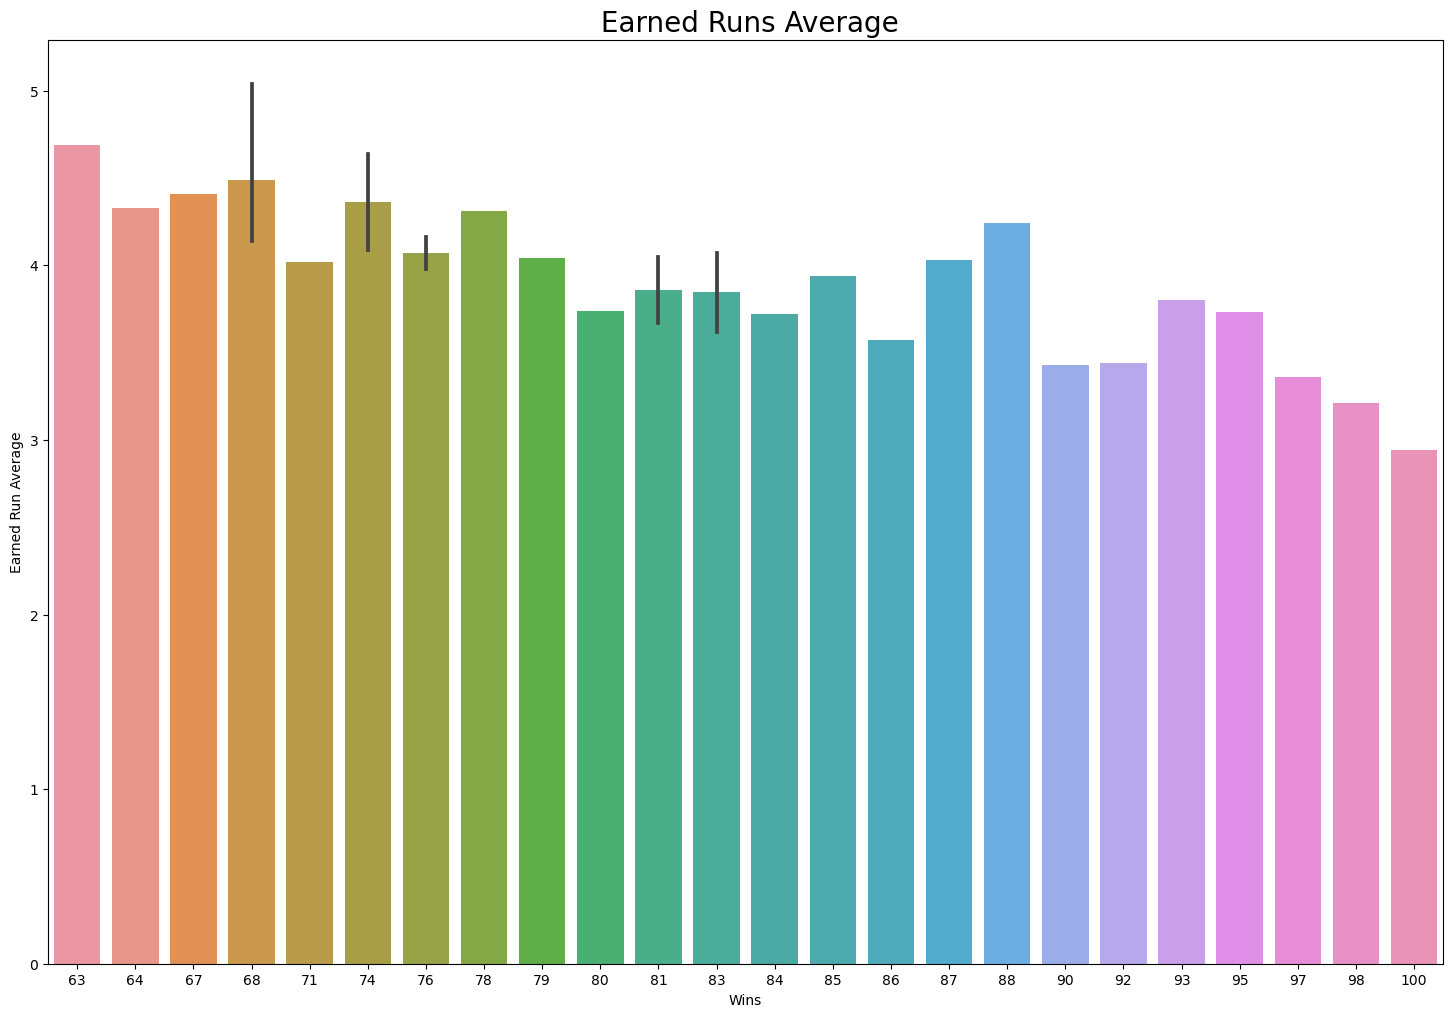

In [16]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned Run Average", data=df)
plt.title(' Earned Runs Average', fontsize =20)
plt.show()
#ERA is low for maximum wins
# Earned Run and Wins must have negative relationship
#ERA and Runs Average score are bound to related with each other in linear relationship

Text(0, 0.5, 'Earned Run Average')

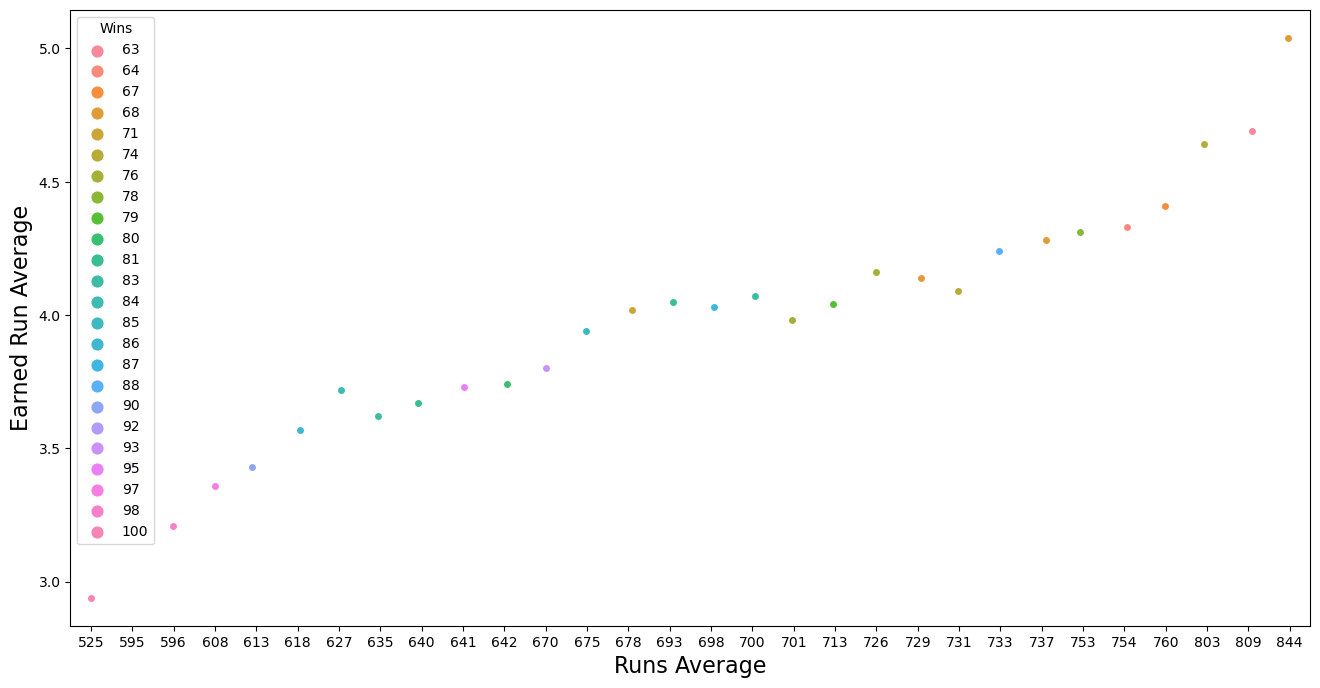

In [18]:
plt.figure(figsize=(16,8))
sns.stripplot(df['Runs Average'],df['Earned Run Average'],hue =df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)
#ERA and RA hold linear relationship.

In [19]:
df['Runs Scored'].max()

891

In [20]:
df.loc[df['Runs Scored']==891]
# highest Doubles, Homeruns and base ball also belong to this entry. Let's check one more time through max only 

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


In [21]:
df['Runs Scored'].max(),df['Base on Balls'].max(),df['Doubles'].max()

(891, 570, 308)

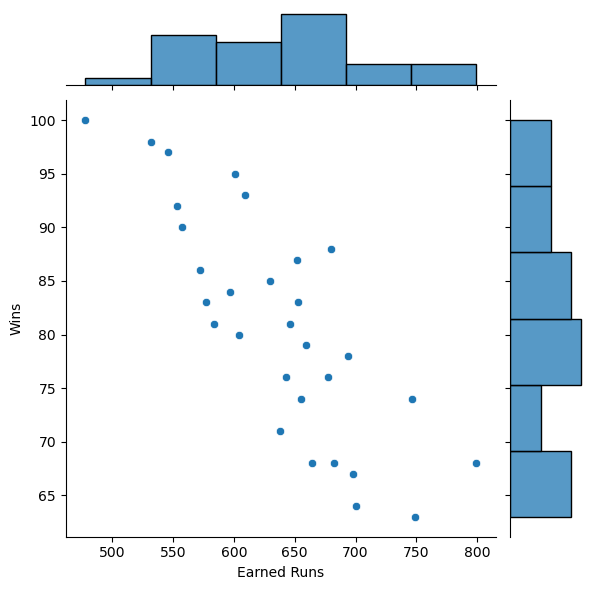

In [22]:
#In one of the previous result we suspect that Earned Run Average and Wins must have negative relationship, let check by looking at jointplot.

sns.jointplot(x='Earned Runs',y='Wins',data=df)

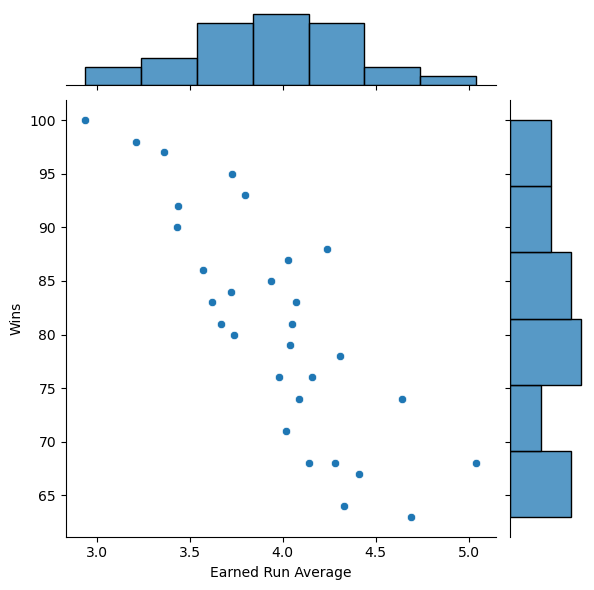

In [23]:
sns.jointplot(x='Earned Run Average',y='Wins',data=df)

In [24]:
#both showing linear negative relation

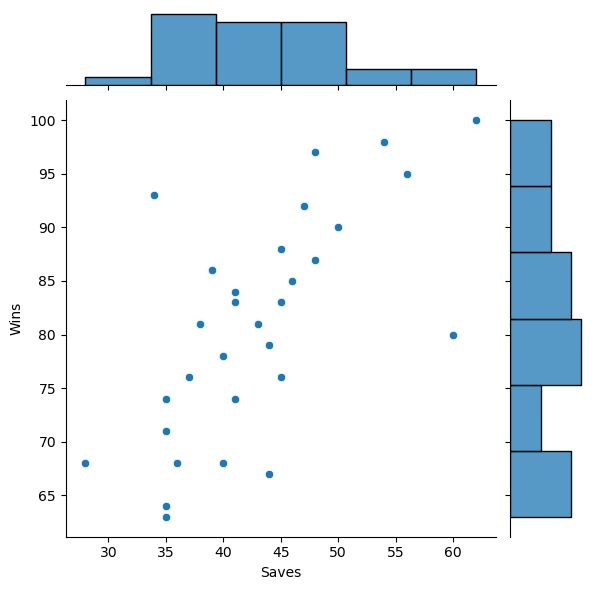

In [25]:
sns.jointplot(x='Saves',y='Wins',data=df)
#checked with saves alos as saves always place a IMP role in every match irrespective of sports 
#increase save and more wins 

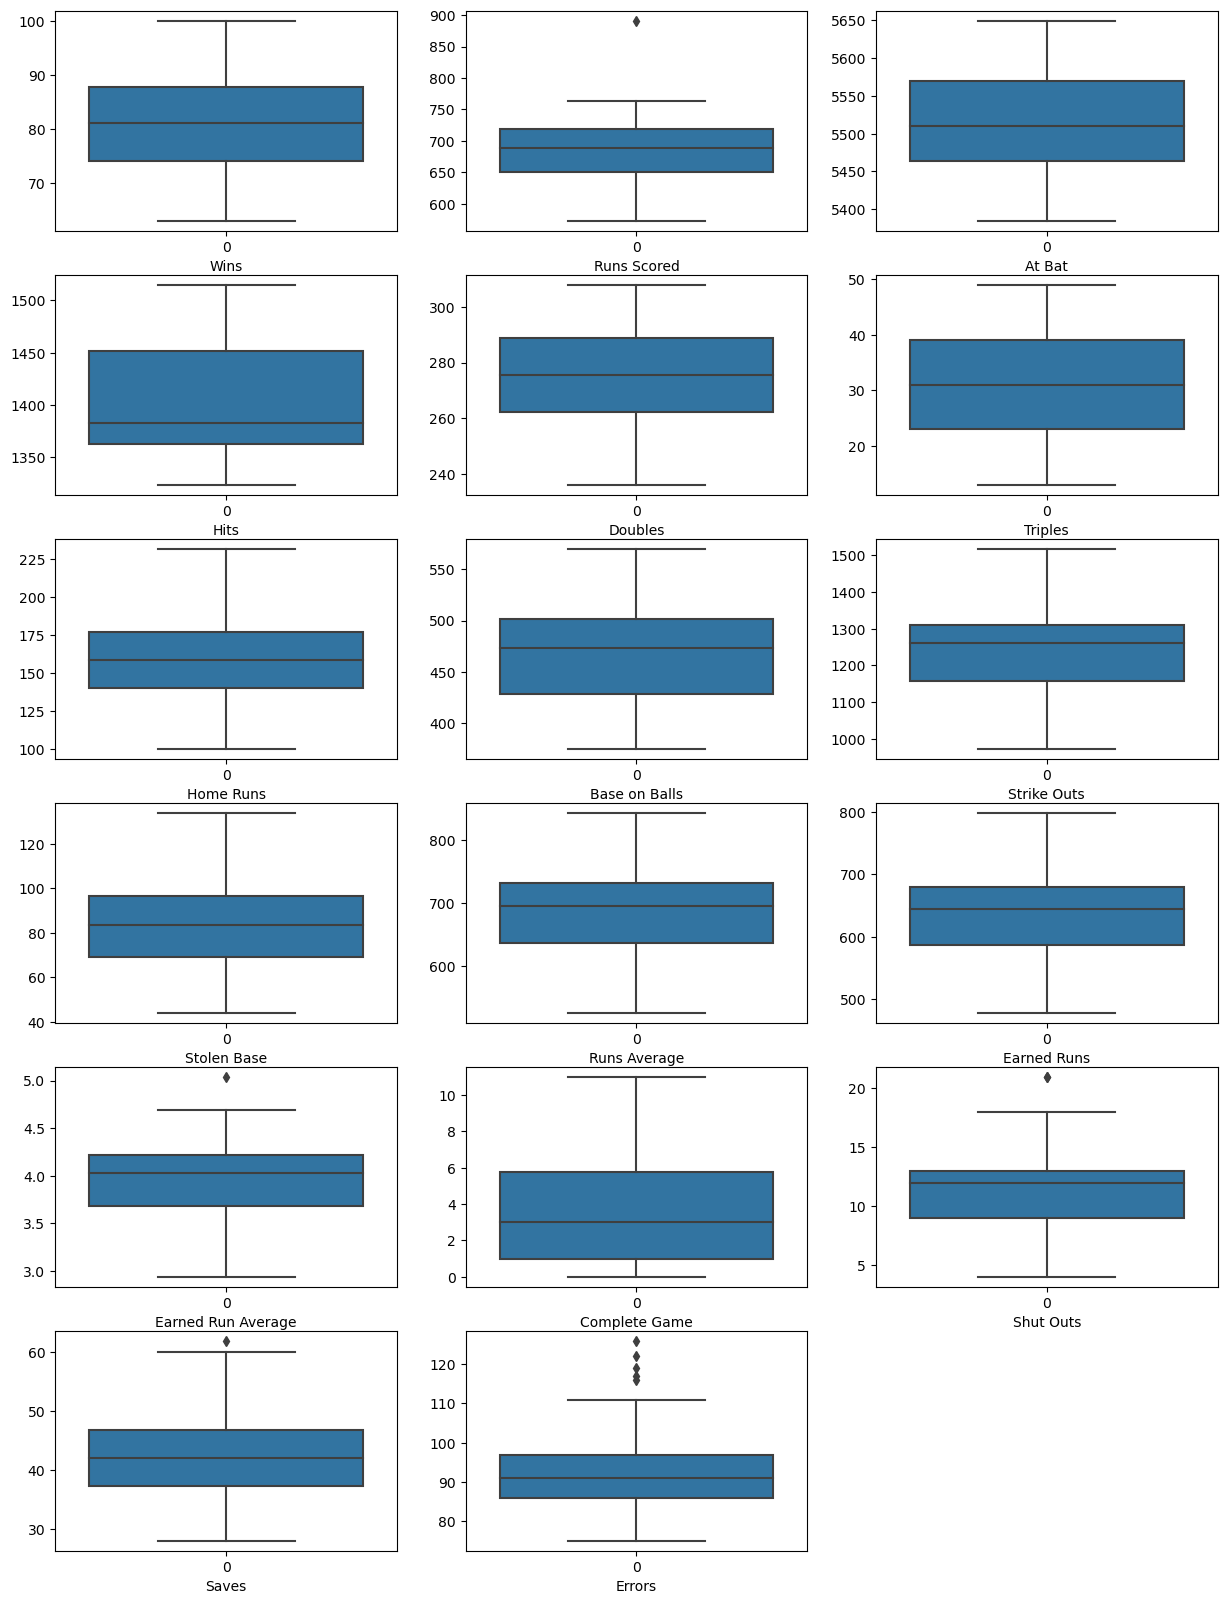

In [26]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
    
plt.show()  
#Some of the features have outliers but very less
#Outliers in Errors are totally possible so now need to worry about 

In [27]:
#time to treat outlier from data set 
from scipy.stats import zscore
#importing zscore

# Z score method for removing outlier the acceptable range is  +/-0.5 value of skewness.

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [28]:
df.shape
#shape after removing outliers 

(29, 17)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]
vif['feature'] = df.columns

vif
#Checking Multicollinearity between features using variance_inflation_factor
#collenarity is very high 
#Earned Run Average,Earned Runs,Runs Average are highly correlated with each other
#data needs to standarized that is pending 
#we can apply PCA and standarized method 

,vif,feature
0,1136.419542,Wins
1,3372.620602,Runs Scored
2,5149.560597,At Bat
3,4646.411583,Hits
4,1109.169779,Doubles
5,35.766244,Triples
6,289.402974,Home Runs
7,295.570400,Base on Balls
8,400.617550,Strike Outs
9,28.931744,Stolen Base


In [31]:
x = df.drop('Wins',axis = 1)
y = df['Wins']
#split data into feature and target varibale 

In [32]:
scaler= StandardScaler()
x_scaler = scaler.fit_transform(x)
#data  standarized has been done 

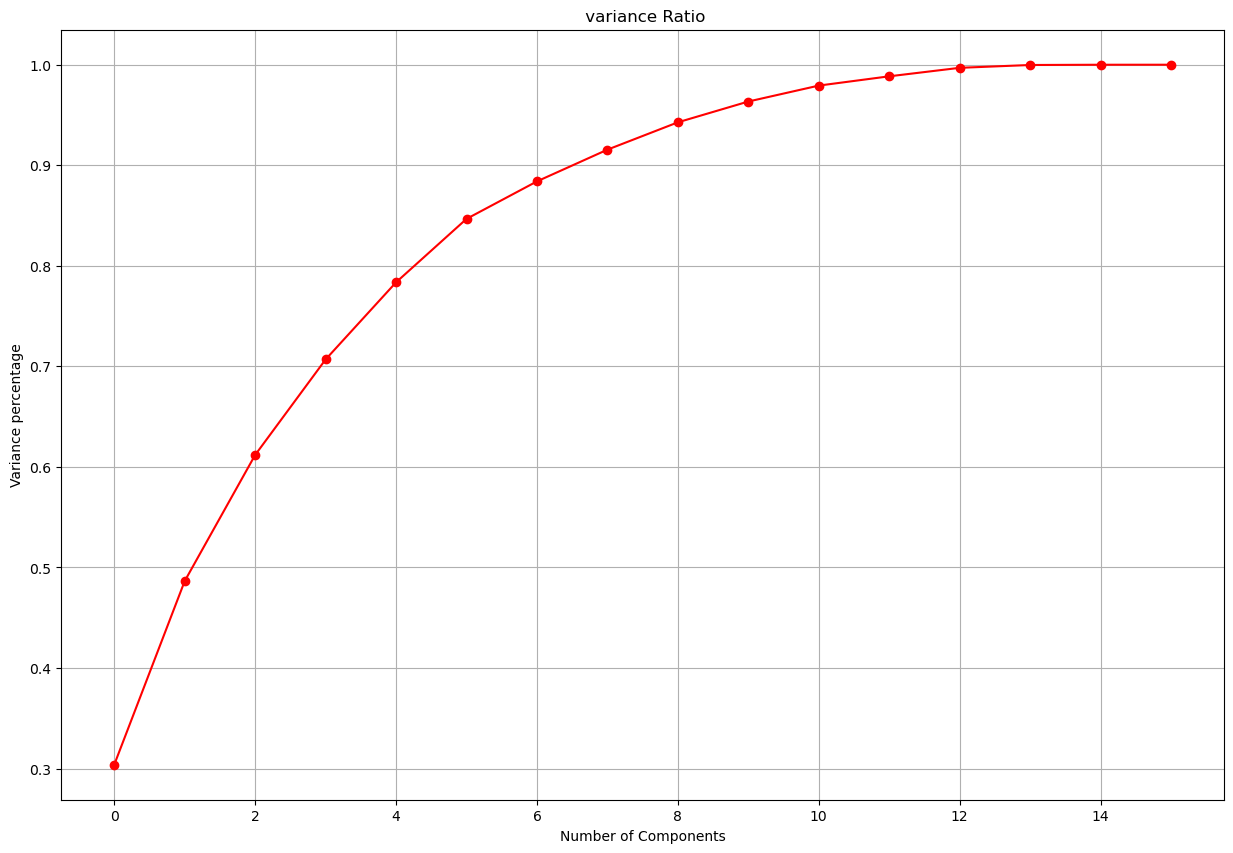

In [33]:

#PCA technique have to apply and needs to check theprincipal components
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaler)
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance percentage')
plt.title(' variance Ratio')
plt.grid()
#most of the princiap components comesat 95% , we can pick that only 

In [34]:
pca_n = PCA(n_components=7)
x_new = pca_n.fit_transform(x_scaler)

X = pd.DataFrame(x_new,columns=np.arange(7))

In [35]:
X

,0,1,2,3,4,5,6
0,1.040418,-2.998482,2.390631,-0.782861,-2.440002,-0.007693,0.640910
1,0.082502,0.473554,0.333381,-0.182392,-0.320951,0.467551,-1.039055
2,-1.234703,-0.852540,-0.038259,3.252264,-0.757129,-0.714970,1.549105
3,0.680562,1.423353,0.804293,0.994373,0.358662,-0.945762,-0.009278
4,3.375800,-1.483663,-0.739327,1.793146,-0.109332,0.217560,-1.128995
5,-0.329446,-0.226394,-2.762484,-1.300450,-1.693950,-1.053420,1.057617
6,-0.708705,2.230857,-1.603350,-1.601015,-1.676362,0.858409,-1.233220
7,-1.402802,-0.019392,1.155383,-1.545183,0.051551,0.432543,-0.010320
8,2.148232,-1.993567,-0.923356,-0.089902,-1.171097,-1.143858,-0.387613
9,1.036721,-0.929021,-1.425914,-0.335159,0.622014,-1.038534,0.793520


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['feature'] = X.columns

vif
#We can see that Multicollinearity issue is clear now.

,vif,feature
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [39]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.43198221318108976
mean_squared_error: 40.5186021264156
Squareroot_mean_squared_error 6.365422383975442
Root Mean Squared Log Error   1.8508805902122412


In [40]:
test_score =  LinearRegression.score(x_train,y_train)
test_score
#test score

0.9078261122709037

In [41]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)
#copmring acutal  vs predcted 

,Actual,Predict
8,80,88.617540
16,98,94.544821
22,71,71.914506
10,88,76.738213
1,83,81.534169
20,90,95.205626


In [42]:
lin_reg=LinearRegression

In [43]:
maxR2_score=0
maxRS=0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.25)
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)
#R2 with 2 different tecniques also 

Best R2 Score is 0.9152406791622375 on Random_state 106


In [44]:
cv_score = (cross_val_score(LinearRegression, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check       

Cross Validation Score: 3.76286604965234


In [45]:
# Ridge:
from sklearn.linear_model import RidgeCV
Ridge = RidgeCV()
Ridge = Ridge.fit(x_train, y_train)

# Prediction:
y_pred = Ridge.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.6833845758368099
mean_squared_error: 29.682696015299072
Squareroot_mean_squared_error 5.4481828177199665
Root Mean Squared Log Error   1.6952821251344068


In [46]:
cv_score = (cross_val_score(Ridge, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check      

Cross Validation Score: 23.12181733887682


In [47]:
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)
# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7362353333333332
mean_squared_error: 24.72793750000001
Squareroot_mean_squared_error 4.972719326485259
Root Mean Squared Log Error   1.6039668386637151


In [ ]:
cv_score = (cross_val_score(RandomForestRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

In [48]:
#hyper parameter tunning  for RandomForestRegressor

from sklearn.model_selection import GridSearchCV
#hyper parameter tunning 
grid_params = para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid = GridSearchCV(estimator=RandomForestRegressor,
                   param_grid = grid_params,
                   cv = 5)

In [50]:
grid_search_RF = GridSearchCV(RandomForestRegressor,para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(x_train,y_train)
print(grid_search_RF.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}


In [52]:
##hyper parameter tunning 
from sklearn.ensemble import RandomForestRegressor 
Final_mod =  RandomForestRegressor(n_estimators=200 , max_depth= 3, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 
print('\n')

Mean absolute error : 4.607577106920862
Mean squared error : 31.83122715467266
Root Mean Squared Error: 5.641916975166566


 R2 Score of Final Model
0.6604669103501584




In [53]:
#Decision_Tree
Decision_Tree = DecisionTreeRegressor()
Decision_Tree = Decision_Tree.fit(x_train, y_train)

# Prediction:
y_pred = Decision_Tree.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.5986666666666667
mean_squared_error: 37.625
Squareroot_mean_squared_error 6.1339220731926485
Root Mean Squared Log Error   1.8138343615345198


In [74]:
#lasso
lassocv = LassoCV(alphas = None,max_iter=10,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=10, normalize=True)

In [75]:
alpa = lassocv.alpha_
alpa
lasso = Lasso(alpa)

In [76]:
lasso
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)
a_pred = lasso.predict(x_test)

In [77]:
a_pred

array([85.21158322, 58.49430183, 80.51474594, 79.12285332, 95.67280507,
       83.7064154 , 89.13108879, 90.45651288])

In [78]:
# Lasso:
lassocv = LassoCV(alphas = None,max_iter=10,normalize=True)
lassocv.fit(x_train,y_train)

alpa = lassocv.alpha_
alpa
lasso = Lasso(alpa)

lasso
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)
a_pred = lasso.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, a_pred))
print('mean_squared_error:',mean_squared_error(y_test, a_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, a_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, a_pred))))

r2_score: 0.7156369415102906
mean_squared_error: 26.659036733410254
Squareroot_mean_squared_error 5.1632389769804625
Root Mean Squared Log Error   1.6415640912839027


In [79]:
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})
final_values
#look the predicted value and  actual vallue

,Actual values,Predicted values
20,90,88.318558
24,63,68.033867
12,85,74.223007
13,76,78.253220
0,95,73.672066
27,79,73.884018
25,92,95.183311
8,80,82.480042


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor 

In [88]:
#KNeighborsRegressor
KNeighborsRegressor = KNeighborsRegressor()
KNeighborsRegressor = KNeighborsRegressor.fit(x_train, y_train)

# Prediction:
y_pred = KNeighborsRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.27605333333333326
mean_squared_error: 67.87
Squareroot_mean_squared_error 8.238325072488946
Root Mean Squared Log Error   2.1087970553578335


In [89]:
cv_score = (cross_val_score(KNeighborsRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -45.97572588350181


In [90]:
#GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor = GradientBoostingRegressor.fit(x_train, y_train)

# Prediction:
y_pred = GradientBoostingRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))


r2_score: 0.5692651070910035
mean_squared_error: 40.38139621021841
Squareroot_mean_squared_error 6.354635804687662
Root Mean Squared Log Error   1.849184594531508


In [91]:
cv_score = (cross_val_score(GradientBoostingRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -144.3232348406355


In [92]:
#AdaBoostRegressor
AdaBoostRegressor = AdaBoostRegressor()
AdaBoostRegressor = AdaBoostRegressor.fit(x_train, y_train)

# Prediction:
y_pred = AdaBoostRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.6663570370370371
mean_squared_error: 31.279027777777774
Squareroot_mean_squared_error 5.592765664479227
Root Mean Squared Log Error   1.7214739169604942


In [93]:
cv_score = (cross_val_score(AdaBoostRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -100.34312096970883


In [97]:
#XGBRegressor
XGBRegressor = XGBRegressor()
XGBRegressor = XGBRegressor.fit(x_train, y_train)

# Prediction:
y_pred = XGBRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score: 0.13769897819225052
mean_squared_error: 80.84072079447651
Squareroot_mean_squared_error 8.991146800852297


In [98]:
cv_score = (cross_val_score(XGBRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -121.38467823560102


In [ ]:


# best model is RandomForestRegressor after hyperparamaetr tuning it give best result 